# CSST主巡天Cycle1模拟数据说明  
## A Quick Start
nan.li at nao.cas.cn  
jdli at nao.cas.cn  
  
  
Cycle 3的仿真数据共包含多色成像和无缝光谱两部分数据，其中多色成像部分又包含了两组仿真，即是否添加引力透镜的剪切信号。  
数据文件包含了对应10平方度内500个pointing仿真的独立目录，即Cycle-3-SimuData/CSST_shearOFF/MSC_0000***. 
1. 多色成像  
根目录:        /share/Cycle-3-SimuData/multipleBandsImaging/  
不包含透镜剪切：/share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearOFF    
包含透镜剪切:   /share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearON  
数据文件:  
图像：MSC_2103040093000_0000***_<chipID>_raw.fits   
源表：MSC_2103040093000_0000***_<chipID>.cat  
宇宙线：CosmicRay_<chipID>.fits  
    
2. 无缝光谱（不包含透镜剪切)
无缝光谱模拟：./CSST_shearOFF
无缝光谱对应图像：./CSST_shearOFF_IMG
数据文件：
光谱: ./CSST_shearOFF/MSC_2103040093000_0000***_<chipID>_raw.fits  
源表: ./CSST_shearOFF/MSC_2103040093000_0000***_<chipID>.cat  
宇宙线: ./CSST_shearOFF/CosmicRay_<chipID>.fits  
对应图像：  
./CSST_shearOFF_IMG/MSC_2103040093000_0000***_<chipID>_raw_img.fits


## 读出特定指向的特定探测器的输入星表

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
pathCats = '/share/simulation_fits/CSSOSDataProductsSims/data/catalog_points_7degree2/'

# read pointing config
f = open(pathCats + 'pointing1.dat', 'r')
for _ in range(1):
    header = f.readline()
    line = 0
    pRA = []
    pDEC = []
    
for line in f:
    line = line.strip()
    columns = line.split()
    pRA.append(float(columns[0]))
    pDEC.append(float(columns[1]))
f.close()

pRA, pDEC = np.array(pRA), np.array(pDEC)

In [2]:
"""select field pointing"""

ipoint = 50
pointRa = float('{:8.4f}'.format(pRA[ipoint]))
pointDec = float('{:8.4f}'.format(pDEC[ipoint]))


Reference  
https://iopscience.iop.org/article/10.3847/1538-4365/ab510c  
https://github.com/LSSTDESC/gcr-catalogs/blob/master/GCRCatalogs/SCHEMA.md#schema-for-extragalatic-catalogs

In [3]:
# read catalogue - gals & stars
ngals = 0
nstars = 0

filenameDir = 'point_RA' + str(pointRa) + '_DE' + str(pointDec) + '/'
for i in range(1, 31):
    gals = Table.read(pathCats + filenameDir + 'galaxies_ccd' + '{:0=2}'.format(i) + 
                      '_p_RA' + str(pointRa) + '_DE' + str(pointDec) + 
                      '.hdf5')
    stars = Table.read(pathCats + filenameDir + 'stars_ccd' + '{:0=2}'.format(i) + 
                      '_p_RA' + str(pointRa) + '_DE' + str(pointDec) + 
                      '.hdf5')
    ngals = gals['galaxyID'].size
    nstars = stars['sourceID'].size
    print('ccd' + '{:0=2}'.format(i) + ':')
    print('gals:', ngals)
    print('stars:', nstars)
    
print(gals.columns)

ccd01:
gals: 8351
stars: 503
ccd02:
gals: 7430
stars: 464
ccd03:
gals: 3866
stars: 501
ccd04:
gals: 353
stars: 434
ccd05:
gals: 0
stars: 494
ccd06:
gals: 8045
stars: 501
ccd07:
gals: 8338
stars: 473
ccd08:
gals: 8915
stars: 485
ccd09:
gals: 8048
stars: 476
ccd10:
gals: 5490
stars: 456
ccd11:
gals: 7821
stars: 573
ccd12:
gals: 8696
stars: 450
ccd13:
gals: 7998
stars: 439
ccd14:
gals: 7555
stars: 492
ccd15:
gals: 7682
stars: 481
ccd16:
gals: 8296
stars: 3081
ccd17:
gals: 7943
stars: 460
ccd18:
gals: 7832
stars: 464
ccd19:
gals: 7332
stars: 499
ccd20:
gals: 7431
stars: 465
ccd21:
gals: 7842
stars: 11647
ccd22:
gals: 8586
stars: 469
ccd23:
gals: 8114
stars: 459
ccd24:
gals: 8183
stars: 463
ccd25:
gals: 8048
stars: 501
ccd26:
gals: 8368
stars: 2829
ccd27:
gals: 8529
stars: 486
ccd28:
gals: 8816
stars: 496
ccd29:
gals: 8402
stars: 507
ccd30:
gals: 8153
stars: 475
<TableColumns names=('size_disk_true','Mag_true_g_lsst_z0','mag_true_i_lsst','redshift_true','size_minor_bulge_true','halo_mass','

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import os
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rcParams
rcParams["font.size"] = 14

# 数据产品  

## a.多色成像

In [5]:
shear_type = ['ON', 'OFF']

rootpath = '/share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearOFF/MSC_0000'

pointID = '000' # 000-499
chipID = '06' # 06-25


fname = rootpath + pointID +'/'+'MSC_210304093000_0000'+pointID + '_'+ chipID + '_raw.fits'
print(fname)
# os.path.isfile(fname)


/share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearOFF/MSC_0000000/MSC_210304093000_0000000_06_raw.fits


In [6]:
"""Load all multiple Bands Imaging"""


def MBI_path(rootpath, shear='ON'):
    
    fname_list = []
    if shear=='ON':
        rootpath = rootpath + 'CSST_shearON/MSC_0000'
    elif shear=='OFF':
        rootpath = rootpath + 'CSST_shearOFF/MSC_0000'
    
    for pointID in range(499):
        pointID = '{0:03}'.format(pointID)
        
        for chipID in range(6,25):
            chipID = '{0:02}'.format(chipID)
    
            fname = rootpath + pointID +'/'+\
                    'MSC_210304093000_0000'+\
                    pointID + '_'+ chipID + '_raw.fits'
            if os.path.isfile(fname):
                fname_list += [fname]
            else:
                pass
    
    return fname_list


shear_type = ['ON', 'OFF']
rootpath = '/share/Cycle-3-SimuData/multipleBandsImaging/'

fname_list = MBI_path(rootpath, shear='OFF')
print(len(fname_list))

8483


### 头文件说明  

头文件中包含了Primary header 和 Extension header两部分，  
Primary header 定义了共性的部分，Extension header部分针对不同的滤光片不同CCD进行定义，  
头文件定义示例如下

In [7]:
hdul = fits.open(fname)

print(hdul.info())
print("Primary header: \n")

hdul[0].header

Filename: /share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearOFF/MSC_0000000/MSC_210304093000_0000000_06_raw.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   ()      
  1  RAW,06      1.0 ImageHDU        55   (9216, 9232)   int16 (rescales to uint16)   
None
Primary header: 



SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2020-01-01'         / Date this file was written                     
FILENAME= 'MSC_210304093000_0000000_06_raw' / Name of file                      
FILETYPE= 'zero    '           / Type of data                                   
COMMENT ==================================================================      
COMMENT Target information                                                      
COMMENT ==================================================================      
EXPNUM  =           99999999.0 / Exposure sequence number                       
TARGNAME= 'CSST_   '           / Observation title                              
RADECSYS= 'FK5     '        

In [8]:
hdul[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
BSCALE  =                    1                                                  
BZERO   =                32768                                                  
NAXIS1  =                 9216                                                  
NAXIS2  =                 9232                                                  
EXTNAME = 'RAW,06  '           / Extension name                                 
EXTVER  =                  1.0 / The ID number                                  
OBSID   = 'CSST.20200101T000000' / Observation ID                               
COMMENT ====================

## 数据示例

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


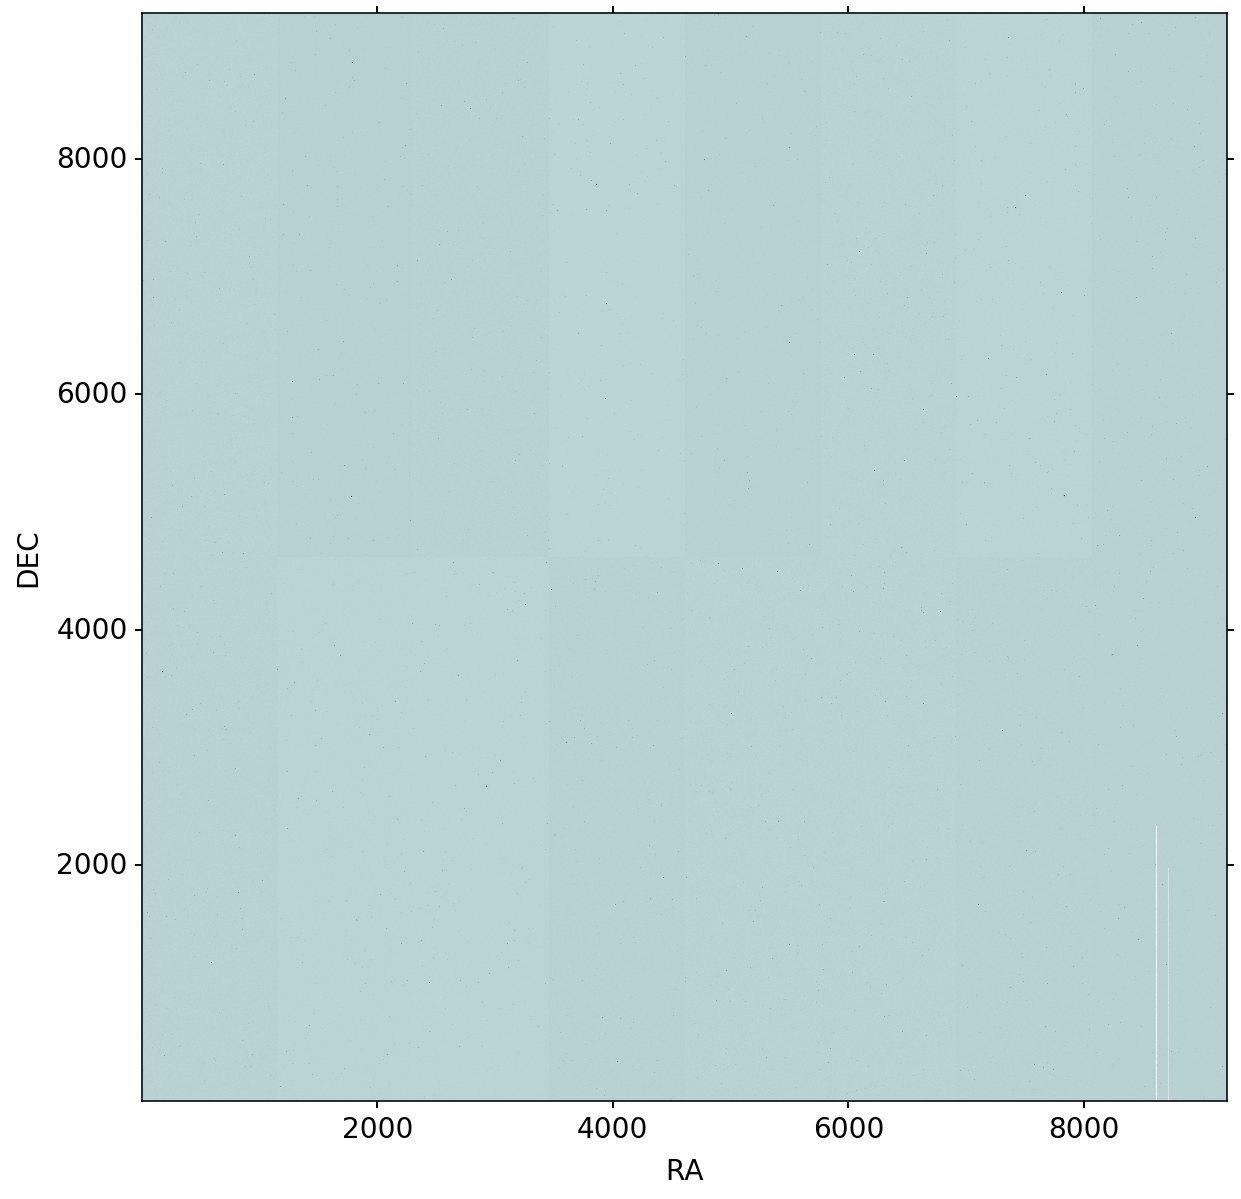

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=WCS(hdul[0].header))
ax.imshow(hdul[1].data, norm=colors.LogNorm(), cmap='bone_r')
ax.set_xlabel('RA'); ax.set_ylabel('DEC');

### 无缝光谱数据示例

## 展示一个指向的输出数据

Note: `pip install reproject` or  
`conda install -c astropy reproject`